In [16]:
# Install required libraries
!pip install transformers pandas openpyxl


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [17]:
import pandas as pd
from transformers import XLNetTokenizer, XLNetModel
import torch

# Load XLNet model and tokenizer
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = XLNetModel.from_pretrained('xlnet-base-cased')

In [18]:
# Load your long text dataset from Excel
excel_file_path = 'TRAIN FAKE N NOT FAKE list.xlsx'
df = pd.read_excel(excel_file_path)

# Tokenize and embed each text in the dataset
embedded_vectors = []

for text in df['cleaned_desc']:
    # Tokenize the text
    tokens = tokenizer.encode(text, return_tensors='pt', max_length=600, truncation=True)
    
    # Get the model's output for the tokenized text
    with torch.no_grad():
        output = model(tokens)

    # Extract the embeddings from the output
    embeddings = output.last_hidden_state.mean(dim=1).squeeze().numpy()

    # Append the embedded vector to the list
    embedded_vectors.append(embeddings)

In [19]:
# Create a new column in the DataFrame for the embedded vectors
df['embedded_text_vectors2'] = embedded_vectors

In [20]:
# Assuming 'df' is your DataFrame and 'embedded_vectors' is the column of interest
num_vectors = df['embedded_text_vectors2'].apply(len)
num_vectors_count = num_vectors.max()  # Assuming all vectors have the same length, otherwise use min()

# Print or use 'num_vectors_count' as needed
print(f"The number of vectors in the 'embedded_vectors' column is: {num_vectors_count}")

The number of vectors in the 'embedded_vectors' column is: 768


In [21]:
# Import numpy
import numpy as np

# Convert the embedded value column to a numpy array and store it in a new column
df['embedded_text_array'] = df['embedded_text_vectors2'].apply(np.array)

# View the new column
print(df['embedded_text_array'])

0       [-0.3363816, -0.4192422, -1.2975863, -0.148102...
1       [-0.62456393, 0.01905732, -1.1915078, 1.541153...
2       [0.70500356, -0.2599463, -1.1828982, 0.9566848...
3       [-0.56555724, 0.57753664, -1.8101645, 0.592870...
4       [-0.6205235, 0.5610315, -0.7767066, 0.495443, ...
                              ...                        
6012    [-0.4073109, 0.40750095, -1.2619517, 1.1059655...
6013    [-0.96189827, -0.2511359, -1.4316351, 0.769273...
6014    [-0.9750417, 0.29552582, -1.5374432, 0.7391458...
6015    [-0.8608815, 0.26670825, -1.1056975, 1.046599,...
6016    [-0.9033656, -0.0057720942, -1.4722044, 1.2355...
Name: embedded_text_array, Length: 6017, dtype: object


In [22]:
import pandas as pd
import tensorflow as tf

# Assuming df is your DataFrame with the 'embedded_vector' column
# Replace the ellipsis (...) with the actual column name if it's different
#df = pd.DataFrame('embedded_array2')

# Convert the entire 'embedded_vector' column to a TensorFlow tensor
text_tensor_array = tf.convert_to_tensor(df['embedded_text_array'].tolist(), dtype=tf.float32)

# Use tensor_array in your TensorFlow model training
# For example, you can use it as input to the model.fit() method

In [23]:
print(text_tensor_array)

tf.Tensor(
[[-0.3363816  -0.4192422  -1.2975863  ... -1.1648306   0.928716
  -0.42398942]
 [-0.62456393  0.01905732 -1.1915078  ... -0.975768    0.40207505
  -0.83513427]
 [ 0.70500356 -0.2599463  -1.1828982  ... -0.969098    3.2883472
  -0.60048383]
 ...
 [-0.9750417   0.29552582 -1.5374432  ... -0.84451395 -0.3704562
  -0.41449225]
 [-0.8608815   0.26670825 -1.1056975  ... -1.1205584   0.5767414
  -0.5991513 ]
 [-0.9033656  -0.00577209 -1.4722044  ... -0.9513783  -0.6098981
  -0.579555  ]], shape=(6017, 768), dtype=float32)


In [24]:
import os
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

In [25]:
pip install tensorflow


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input

# Specify the depth of ResNet (n can be 50, 101, 152, etc.)
#n = 101

# Load ResNet model
resnet_model = ResNet101(weights='imagenet', include_top=False, pooling='avg' )

# You can then use this model for image embedding or fine-tune it for your specific task

In [27]:
# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

# Function to extract ResNet embeddings
def extract_resnet_embeddings(image_path, model):
    img_array = load_and_preprocess_image(image_path)
    img_array = img_array.reshape((1,) + img_array.shape)
    embeddings = model.predict(img_array)
    return embeddings.flatten()

In [28]:
# Path to the folder containing images
image_folder = 'TRAIN FAKE N NOT FAKE'


In [29]:
# Create empty lists to store embeddings and labels
embeddings_list = []
labels_list = []

# Iterate through the DataFrame and extract embeddings
for index, row in df.iterrows():
    filename = row['Filename']
    label = row['label_preprocess2']
    image_path = os.path.join(image_folder, filename)
    
    # Check if the image file exists
    if os.path.exists(image_path):
        # Extract ResNet embeddings
        embeddings = extract_resnet_embeddings(image_path, resnet_model)
        
        # Append embeddings and labels to the lists
        embeddings_list.append(embeddings)
        labels_list.append(label)

1/1 [==============================] - 0s 79ms/step


/Users/maifuza/anaconda3/lib/python3.11/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (98885940 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 176ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 96ms/step


In [30]:
# Create a DataFrame for the embeddings
embeddings_df = pd.DataFrame(data={'Embedded_Image_Vector': embeddings_list})

# Add the 'label' column to the DataFrame
embeddings_df['label_preprocess2'] = labels_list

# Display the DataFrame with embeddings and labels
print(embeddings_df)

                                  Embedded_Image_Vector  label_preprocess2
0     [0.027690778, 1.3062037, 0.11597456, 0.1574501...                  1
1     [0.14891379, 0.0294527, 0.0, 0.34314907, 0.114...                  1
2     [0.9403254, 0.076770015, 0.0, 0.0, 0.10947679,...                  1
3     [0.0, 0.0, 0.04750438, 0.3939241, 0.094904, 0....                  1
4     [0.13834175, 0.15395455, 0.25311446, 0.1529849...                  1
...                                                 ...                ...
6012  [1.4562796, 2.9742877, 0.029203288, 0.02713140...                  0
6013  [0.49198368, 1.6945243, 0.17802507, 0.60428005...                  0
6014  [5.406712, 1.2689247, 0.046026528, 0.006622562...                  0
6015  [0.82214934, 2.4825766, 0.5537256, 0.7806289, ...                  0
6016  [0.25497416, 0.026980055, 0.052285783, 0.04456...                  0

[6017 rows x 2 columns]


In [31]:
X=embeddings_df['Embedded_Image_Vector']

In [32]:
# Create an empty list to store tensors
batch_size = 1000
tensor_list = []

for i in range(0, len(X), batch_size):
    batch_vectors = X[i:i+batch_size]
    # Assuming batch_vectors is a list of arrays with varying shapes
    # Convert each array to a flat array with consistent shape
    batch_vectors_flat = [np.ravel(vec) for vec in batch_vectors]

    # Convert the list of flat arrays to a 2D NumPy array
    tensor_data = np.array(batch_vectors_flat, dtype=np.float32)

    # Convert the NumPy array to a TensorFlow tensor and append to the list
    tensor_list.append(tf.convert_to_tensor(tensor_data))

In [33]:
print(tensor_list)

[<tf.Tensor: shape=(1000, 2048), dtype=float32, numpy=
array([[0.02769078, 1.3062037 , 0.11597456, ..., 0.00302284, 0.12013873,
        0.7833509 ],
       [0.14891379, 0.0294527 , 0.        , ..., 0.6465466 , 0.28369507,
        0.01538314],
       [0.9403254 , 0.07677002, 0.        , ..., 0.16394973, 0.26670685,
        1.0276786 ],
       ...,
       [0.02831759, 0.28477553, 0.29631633, ..., 0.22385609, 0.00427775,
        0.47392264],
       [0.29300714, 0.496413  , 0.36580136, ..., 0.08541662, 0.        ,
        0.09215976],
       [0.24068825, 1.7082615 , 0.        , ..., 0.15482171, 0.00636937,
        0.        ]], dtype=float32)>, <tf.Tensor: shape=(1000, 2048), dtype=float32, numpy=
array([[0.29574302, 0.01013622, 0.        , ..., 0.15259595, 0.21875456,
        0.01304983],
       [0.6037232 , 0.366984  , 0.53998405, ..., 0.221238  , 0.        ,
        0.10253529],
       [0.5728174 , 0.8203885 , 0.42912835, ..., 0.7195147 , 0.23097146,
        0.50365406],
       ...,
   

In [34]:
# Assuming tensor_list is your list of TensorFlow tensors
merged_tensor_image = tf.concat(tensor_list, axis=0)

In [35]:
print(merged_tensor_image)

tf.Tensor(
[[2.76907776e-02 1.30620372e+00 1.15974560e-01 ... 3.02283862e-03
  1.20138735e-01 7.83350885e-01]
 [1.48913786e-01 2.94527002e-02 0.00000000e+00 ... 6.46546602e-01
  2.83695072e-01 1.53831393e-02]
 [9.40325379e-01 7.67700151e-02 0.00000000e+00 ... 1.63949728e-01
  2.66706854e-01 1.02767861e+00]
 ...
 [5.40671206e+00 1.26892471e+00 4.60265279e-02 ... 6.14871383e-01
  1.14100850e+00 2.00764370e+00]
 [8.22149336e-01 2.48257661e+00 5.53725600e-01 ... 7.33671844e-01
  5.66745959e-02 2.49451816e-01]
 [2.54974157e-01 2.69800555e-02 5.22857830e-02 ... 0.00000000e+00
  0.00000000e+00 3.98157626e-01]], shape=(6017, 2048), dtype=float32)


In [36]:
from keras.utils import to_categorical

y= df['label_preprocess2']

y_encoded = to_categorical(y, num_classes=2)

In [37]:
print(y_encoded)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [38]:
from sklearn.model_selection import train_test_split

X_text = df['embedded_text_array']  # Replace 'embedded_vector' with your actual feature column
X_image = embeddings_df['Embedded_Image_Vector']
y = df['label_preprocess2']  # Replace 'label_preprocess2' with your actual target column

# Combine X_text and X_image into a single DataFrame
X_combined = pd.concat([X_text, X_image], axis=1)

# Split the data into train and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X_combined, y, test_size=0.2, stratify=y, random_state=42)

# Separate X_train and X_test back into individual DataFrames
X_train_text = X_train['embedded_text_array']
X_train_image = X_train['Embedded_Image_Vector']

X_valid_text = X_valid['embedded_text_array']
X_valid_image = X_valid['Embedded_Image_Vector']

In [39]:
X_train_text.shape, X_train_image.shape, X_valid_text.shape, X_valid_image.shape, y_train.shape, y_valid.shape

((4813,), (4813,), (1204,), (1204,), (4813,), (1204,))

In [40]:
print(X_train_text)

4092    [-1.0394901, 0.24969783, -1.840182, 0.9497752,...
3016    [-1.2128013, 0.2989649, -1.296087, 0.4957271, ...
3589    [-1.0604292, 0.3215037, -1.3082494, 1.1608804,...
1681    [-0.8301882, -0.1775135, -1.2845789, 1.1612581...
1400    [-1.0926397, 0.21305287, -1.0864049, 0.4899092...
                              ...                        
1268    [-1.3118459, 0.28549868, -0.99256706, 0.646837...
3527    [-0.8616787, -0.01585558, -1.504935, 1.3576655...
2453    [-0.898943, 0.32132548, -1.0024794, 0.57362354...
4568    [-1.0402588, -0.5315335, -1.0183063, 0.8058447...
5926    [-0.96725035, -1.0783784, -0.8289474, 0.217859...
Name: embedded_text_array, Length: 4813, dtype: object


In [41]:
import pandas as pd
import tensorflow as tf

# Assuming df is your DataFrame with the 'embedded_vector' column
# Replace the ellipsis (...) with the actual column name if it's different
#df = pd.DataFrame('embedded_array2')

# Convert the entire 'embedded_vector' column to a TensorFlow tensor
text_train_tensor = tf.convert_to_tensor(X_train_text.tolist(), dtype=tf.float32)

# Use tensor_array in your TensorFlow model training
# For example, you can use it as input to the model.fit() method

In [42]:
print(text_train_tensor)

tf.Tensor(
[[-1.0394901   0.24969783 -1.840182   ... -0.7810697   0.34855413
  -0.10795798]
 [-1.2128013   0.2989649  -1.296087   ... -0.651012    0.0595338
   0.00609022]
 [-1.0604292   0.3215037  -1.3082494  ... -0.9116753  -0.36951712
   0.04813796]
 ...
 [-0.898943    0.32132548 -1.0024794  ... -1.0889333  -0.17115283
  -0.42930397]
 [-1.0402588  -0.5315335  -1.0183063  ... -0.8482871   0.22781396
  -0.36814374]
 [-0.96725035 -1.0783784  -0.8289474  ... -0.77925164  0.08616396
   0.46642584]], shape=(4813, 768), dtype=float32)


In [43]:
import pandas as pd
import tensorflow as tf

# Assuming df is your DataFrame with the 'embedded_vector' column
# Replace the ellipsis (...) with the actual column name if it's different
#df = pd.DataFrame('embedded_array2')

# Convert the entire 'embedded_vector' column to a TensorFlow tensor
text_valid_tensor = tf.convert_to_tensor(X_valid_text.tolist(), dtype=tf.float32)

# Use tensor_array in your TensorFlow model training
# For example, you can use it as input to the model.fit() method

In [44]:
print(text_valid_tensor)

tf.Tensor(
[[-0.623772    0.06549932 -1.2912465  ... -1.1528406   0.3580715
  -0.9319975 ]
 [-1.1447536  -0.52309275 -1.8645501  ... -0.9524825  -0.5746085
  -0.12601653]
 [-0.4403906   0.13515308 -1.145509   ... -1.0171778  -0.4473277
  -0.48900327]
 ...
 [-0.6016105   0.73463655 -2.2197876  ... -1.5817906   3.1739857
  -0.3489942 ]
 [-0.87835425  0.7883237  -1.9990116  ... -1.0619165  -0.12011394
  -0.6478495 ]
 [-1.0636908  -0.47256407 -1.5727315  ... -0.9692448  -0.3514585
  -0.5922563 ]], shape=(1204, 768), dtype=float32)


In [45]:
# Create an empty list to store tensors
batch_size = 1000
image_train_tensor = []

for i in range(0, len(X_train_image), batch_size):
    batch_vectors = X_train_image[i:i+batch_size]
    # Assuming batch_vectors is a list of arrays with varying shapes
    # Convert each array to a flat array with consistent shape
    batch_vectors_flat = [np.ravel(vec) for vec in batch_vectors]

    # Convert the list of flat arrays to a 2D NumPy array
    tensor_data = np.array(batch_vectors_flat, dtype=np.float32)

    # Convert the NumPy array to a TensorFlow tensor and append to the list
    image_train_tensor.append(tf.convert_to_tensor(tensor_data))

In [46]:
print(image_train_tensor)

[<tf.Tensor: shape=(1000, 2048), dtype=float32, numpy=
array([[7.03768671e-01, 9.29458797e-01, 4.04421948e-02, ...,
        3.56868543e-02, 3.72933247e-03, 1.26932085e-01],
       [8.91045570e-01, 2.27496549e-01, 3.07717562e-01, ...,
        4.61823404e-01, 2.19616771e-01, 1.80111039e+00],
       [2.10189670e-01, 2.92548251e+00, 2.74346559e-03, ...,
        1.93997943e+00, 1.03186276e-02, 4.49439615e-01],
       ...,
       [3.40175778e-01, 1.07953444e-01, 2.03879103e-02, ...,
        9.11949128e-02, 1.09585576e-01, 3.49150121e-01],
       [2.06023157e-01, 2.04653487e-01, 8.73408854e-01, ...,
        9.07214079e-03, 1.28609762e-01, 2.06172958e-01],
       [9.20091383e-03, 3.02651167e-01, 7.15554357e-02, ...,
        1.94349551e+00, 1.18435293e-01, 7.94265233e-03]], dtype=float32)>, <tf.Tensor: shape=(1000, 2048), dtype=float32, numpy=
array([[5.5043399e-02, 4.1590381e-01, 1.1603848e-01, ..., 9.3403738e-03,
        3.8395140e-02, 1.0249610e+00],
       [1.4229402e-01, 1.4878811e+00, 1.4

In [47]:
# Assuming tensor_list is your list of TensorFlow tensors
merged_tensor_image_train = tf.concat(image_train_tensor, axis=0)

In [48]:
print(merged_tensor_image_train)

tf.Tensor(
[[7.0376867e-01 9.2945880e-01 4.0442195e-02 ... 3.5686854e-02
  3.7293325e-03 1.2693208e-01]
 [8.9104557e-01 2.2749655e-01 3.0771756e-01 ... 4.6182340e-01
  2.1961677e-01 1.8011104e+00]
 [2.1018967e-01 2.9254825e+00 2.7434656e-03 ... 1.9399794e+00
  1.0318628e-02 4.4943962e-01]
 ...
 [2.3613050e+00 1.3005239e+00 9.7357109e-03 ... 2.4430022e-01
  1.9467501e-01 5.9807375e-03]
 [1.4658687e+00 1.1311159e-01 7.9445522e-03 ... 1.9875601e-01
  7.4126571e-02 6.6205107e-02]
 [5.2876562e-02 2.9163182e-01 1.4821385e-01 ... 2.4584912e-01
  0.0000000e+00 7.0948875e-01]], shape=(4813, 2048), dtype=float32)


In [49]:
# Create an empty list to store tensors
batch_size = 1000
image_valid_tensor = []

for i in range(0, len(X_valid_image), batch_size):
    batch_vectors = X_valid_image[i:i+batch_size]
    # Assuming batch_vectors is a list of arrays with varying shapes
    # Convert each array to a flat array with consistent shape
    batch_vectors_flat = [np.ravel(vec) for vec in batch_vectors]

    # Convert the list of flat arrays to a 2D NumPy array
    tensor_data = np.array(batch_vectors_flat, dtype=np.float32)

    # Convert the NumPy array to a TensorFlow tensor and append to the list
    image_valid_tensor.append(tf.convert_to_tensor(tensor_data))

In [50]:
print(image_valid_tensor)

[<tf.Tensor: shape=(1000, 2048), dtype=float32, numpy=
array([[0.7177365 , 2.1388066 , 0.28556293, ..., 1.5878674 , 1.0362916 ,
        2.5609622 ],
       [0.3936773 , 0.01707962, 0.        , ..., 0.01716338, 0.07725395,
        0.45357794],
       [0.84506905, 0.33671117, 0.        , ..., 1.1152622 , 0.        ,
        0.519625  ],
       ...,
       [0.29273638, 0.41041312, 0.04994659, ..., 0.35809886, 0.02423809,
        0.31225908],
       [0.3419701 , 0.14320563, 0.10380576, ..., 0.        , 0.01319088,
        0.03538276],
       [1.0687667 , 0.9668136 , 0.        , ..., 0.05250409, 0.04120183,
        0.38132524]], dtype=float32)>, <tf.Tensor: shape=(204, 2048), dtype=float32, numpy=
array([[0.910834  , 0.        , 0.27578005, ..., 0.08281574, 0.        ,
        1.1754909 ],
       [0.04546091, 0.62240165, 0.01476718, ..., 0.7671223 , 0.3286248 ,
        1.0812907 ],
       [0.3706275 , 1.4277797 , 0.0346447 , ..., 0.08209396, 0.06968294,
        0.43495902],
       ...,
    

In [51]:
# Assuming tensor_list is your list of TensorFlow tensors
merged_tensor_image_valid = tf.concat(image_valid_tensor, axis=0)

In [52]:
print(merged_tensor_image_valid)

tf.Tensor(
[[7.17736483e-01 2.13880658e+00 2.85562932e-01 ... 1.58786738e+00
  1.03629160e+00 2.56096220e+00]
 [3.93677294e-01 1.70796160e-02 0.00000000e+00 ... 1.71633773e-02
  7.72539452e-02 4.53577936e-01]
 [8.45069051e-01 3.36711168e-01 0.00000000e+00 ... 1.11526215e+00
  0.00000000e+00 5.19625008e-01]
 ...
 [0.00000000e+00 1.21867076e-01 1.08005563e-02 ... 5.83180904e-01
  0.00000000e+00 6.82013988e-01]
 [1.29491806e-01 0.00000000e+00 2.06915941e-03 ... 1.41874263e-02
  3.29975262e-02 9.75847319e-02]
 [6.51258826e-01 8.30982268e-01 1.04526162e-01 ... 4.96957153e-01
  1.81418628e-01 1.00602615e+00]], shape=(1204, 2048), dtype=float32)


In [53]:
print(y_train)

4092    0
3016    0
3589    0
1681    0
1400    0
       ..
1268    0
3527    0
2453    0
4568    0
5926    0
Name: label_preprocess2, Length: 4813, dtype: int64


In [54]:
print(y_valid)

2733    0
2206    0
2115    0
1047    0
4420    0
       ..
4676    0
5096    0
251     1
5665    0
627     1
Name: label_preprocess2, Length: 1204, dtype: int64


In [55]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes=2)

In [56]:
print(y_train_encoded)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [57]:
from keras.utils import to_categorical

y_valid_encoded = to_categorical(y_valid, num_classes=2)

In [58]:
print(y_valid_encoded)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [59]:
from keras.layers import Dense, Input
from keras import regularizers
from keras import initializers
input_image = Input(shape=(2048,))
dense_image = Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.he_normal(seed=0))(input_image)
dense_image = Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.he_normal(seed=0))(dense_image)
# ... Continue with your model architecture


In [60]:
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras import regularizers
from keras import initializers
from keras.models import Sequential, Model
from keras import optimizers
from keras.layers import concatenate 

input_text = Input(shape=(768,))
text_flat = Flatten()(input_text)
dense_text = Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.he_normal(seed=0))(text_flat)
#dense_text = Dropout(0.4)(dense_text)
dense_text = Dense(500,activation='relu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.he_normal(seed=0))(dense_text)
#dense_text = Dropout(0.4)(dense_text)
dense_text = Dense(200,activation='relu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.he_normal(seed=0))(dense_text)
dense_text = BatchNormalization()(dense_text)
dense_text_drop = Dropout(0.4)(dense_text)

input_image = Input(shape=(2048,))
#dense_image = Dense(2000,activation='relu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.he_normal(seed=0))(input_image)
#dense_image = Dropout(0.4)(dense_image)
dense_image = Dense(1000, activation='relu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.he_normal(seed=0))(input_image)
#dense_image = Dropout(0.4)(dense_image)
#dense_image = Dense(500, activation='relu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.he_normal(seed=0))(input_image)
dense_image = Dense(200,activation='relu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.he_normal(seed=0))(dense_image)
dense_image = BatchNormalization()(dense_image)
dense_image_drop = Dropout(0.4)(dense_image)

concat = concatenate([dense_text_drop,dense_image_drop])

inter1_dense = Dense(400,activation='relu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.he_normal(seed=0))(concat)
inter1_dense = Dense(150,activation='relu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.he_normal(seed=0))(inter1_dense)
final_dense = Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializers.he_normal(seed=0))(inter1_dense)
final_dropout = Dropout(0.4)(final_dense)
output = Dense(2, activation='softmax')(final_dropout)

model = Model(inputs=[input_text,input_image], outputs=output)
adam = optimizers.Adam(lr=1e-4)
#adagrad = optimizers.Adagrad(lr=1e-4)
#adamax = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
#checkpoint = ModelCheckpoint(filepath='../checkpoints_gossip/dense_MM_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]

#sgd = optimizers.SGD(lr=1e-4, clipnorm=1.)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 768)]                0         []                            
                                                                                                  
 flatten (Flatten)           (None, 768)                  0         ['input_7[0][0]']             
                                                                                                  
 dense_2 (Dense)             (None, 1000)                 769000    ['flatten[0][0]']             
                                                                                                  
 input_8 (InputLayer)        [(None, 2048)]               0         []                            
                                                                                              

In [61]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

# Define a list of callbacks
callbacks_list = [
    ModelCheckpoint('model_checkpoint.h5', save_best_only=True),
    EarlyStopping(patience=3),
    TensorBoard(log_dir='./logs')
]

# During model training, add the list of callbacks
#model.fit(x_train, y_train, epochs=10, callbacks=callbacks_list)

In [62]:
history = model.fit([text_train_tensor, merged_tensor_image_train],y_train_encoded,
                    validation_data=([text_valid_tensor,merged_tensor_image_valid],y_valid_encoded),batch_size =32,
                    epochs=20,callbacks=callbacks_list)

Epoch 1/20
151/151 [==============================] - 3s 16ms/step - loss: 25.9284 - accuracy: 0.8587 - val_loss: 7.2386 - val_accuracy: 0.8663
Epoch 2/20
  5/151 [..............................] - ETA: 2s - loss: 7.0193 - accuracy: 0.8750

/Users/maifuza/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


151/151 [==============================] - 2s 14ms/step - loss: 3.9128 - accuracy: 0.8853 - val_loss: 2.0687 - val_accuracy: 0.8912
Epoch 3/20
151/151 [==============================] - 2s 13ms/step - loss: 1.3579 - accuracy: 0.8913 - val_loss: 0.8998 - val_accuracy: 0.8978
Epoch 4/20
151/151 [==============================] - 2s 13ms/step - loss: 0.7328 - accuracy: 0.8907 - val_loss: 0.5790 - val_accuracy: 0.8995
Epoch 5/20
151/151 [==============================] - 2s 15ms/step - loss: 0.5181 - accuracy: 0.8949 - val_loss: 0.5143 - val_accuracy: 0.8463
Epoch 6/20
151/151 [==============================] - 2s 13ms/step - loss: 0.4174 - accuracy: 0.9001 - val_loss: 0.4486 - val_accuracy: 0.8522
Epoch 7/20
151/151 [==============================] - 2s 13ms/step - loss: 0.3686 - accuracy: 0.9059 - val_loss: 0.4054 - val_accuracy: 0.8854
Epoch 8/20
151/151 [==============================] - 2s 13ms/step - loss: 0.3454 - accuracy: 0.9096 - val_loss: 0.3531 - val_accuracy: 0.8895
Epoch 9/20

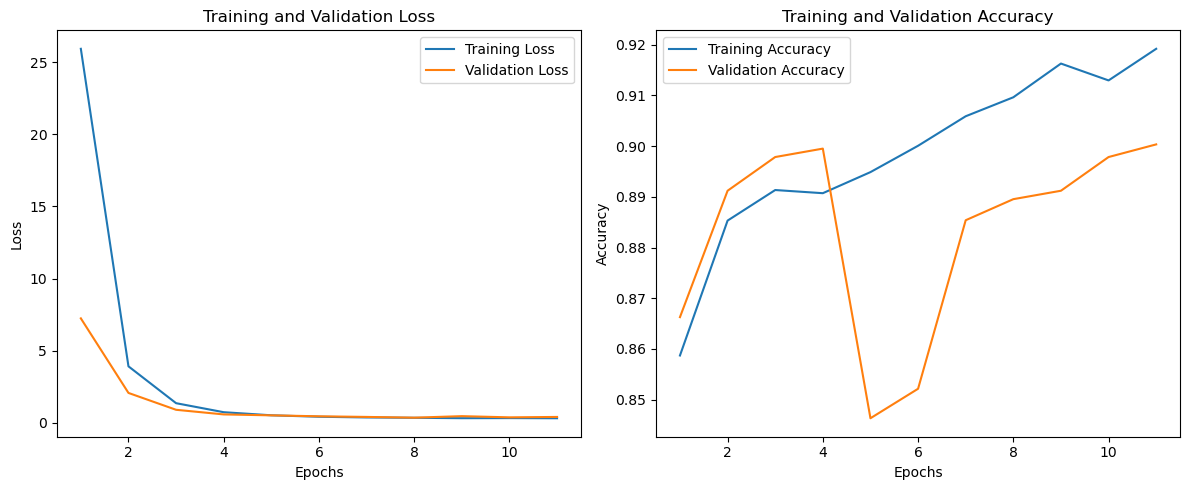

In [63]:
import matplotlib.pyplot as plt

# Training history
train_loss = history.history['loss']
train_acc = history.history['accuracy']

# Validation history
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Plotting
epochs_range = range(1, len(train_loss) + 1)

# Plot Training and Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


In [64]:
# Save the entire model to a HDF5 file
model.save('model_CONCATENATE3_dense200_resnet101.h5')

/Users/maifuza/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
